# Лабораторная работа 1: Методы градиентного спуска и метод Ньютона.

## Imports

In [2]:
from optimization import *
from oracles import *
from plot_trajectory_2d import *
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
np.random.seed(42)

## Experiment 1

In [2]:
np.random.seed(42)

In [214]:
A_high_cond = np.array([[1.0, 2.0],
                        [2.0, 10]])
A_low_cond = np.array([[1.0, 0.5],
                      [0.5, 1.0]])
print(f'Condition number for A_high_cond: {np.linalg.cond(A_high_cond)}')
print(f'Condition number for A_low_cond: {np.linalg.cond(A_low_cond)}')

Condition number for A_high_cond: 18.111452984979746
Condition number for A_low_cond: 2.999999999999999


Conditional number = 18.11, start point = 0, method = Constant, iterations = 384
Conditional number = 18.11, start point = 0, method = Armijo, iterations = 23
Conditional number = 18.11, start point = 0, method = Wolfe, iterations = 15
Conditional number = 18.11, start point = 1, method = Constant, iterations = 558
Conditional number = 18.11, start point = 1, method = Armijo, iterations = 30
Conditional number = 18.11, start point = 1, method = Wolfe, iterations = 19
Conditional number = 18.11, start point = 2, method = Constant, iterations = 422
Conditional number = 18.11, start point = 2, method = Armijo, iterations = 26
Conditional number = 18.11, start point = 2, method = Wolfe, iterations = 20
Conditional number = 3.0, start point = 0, method = Constant, iterations = 1142
Conditional number = 3.0, start point = 0, method = Armijo, iterations = 10
Conditional number = 3.0, start point = 0, method = Wolfe, iterations = 10
Conditional number = 3.0, start point = 1, method = Constant,

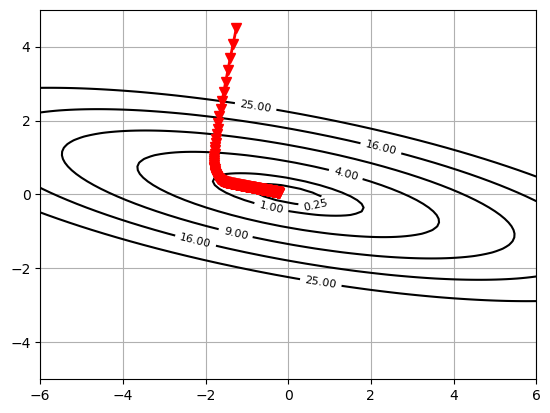

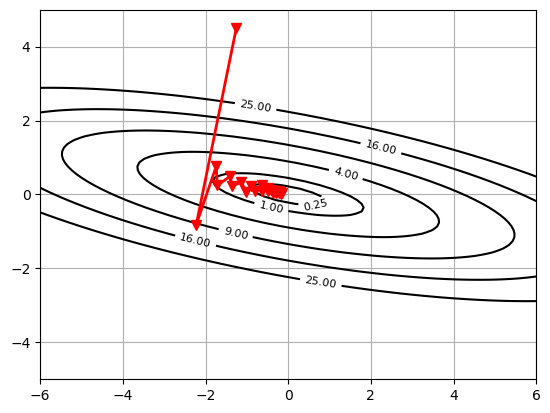

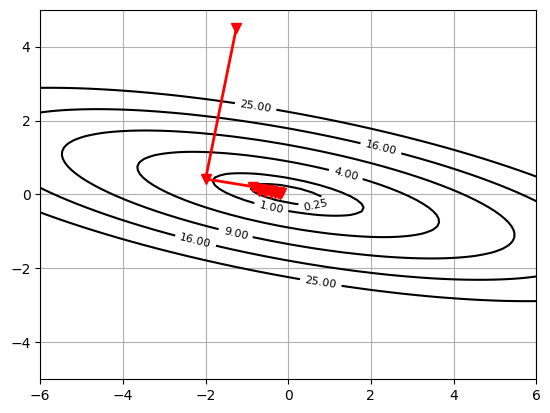

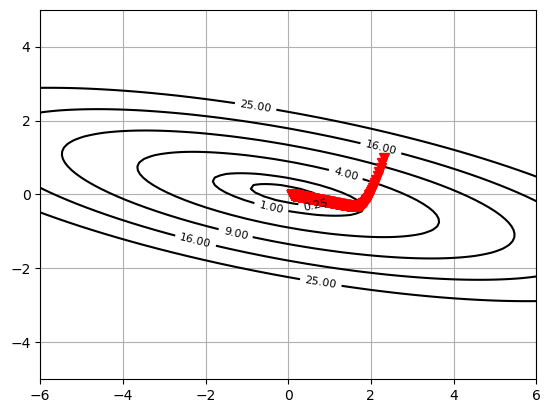

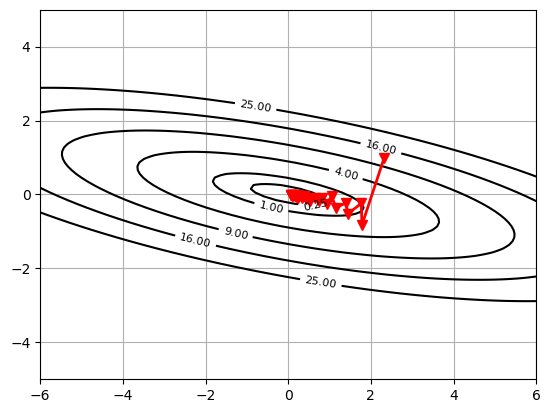

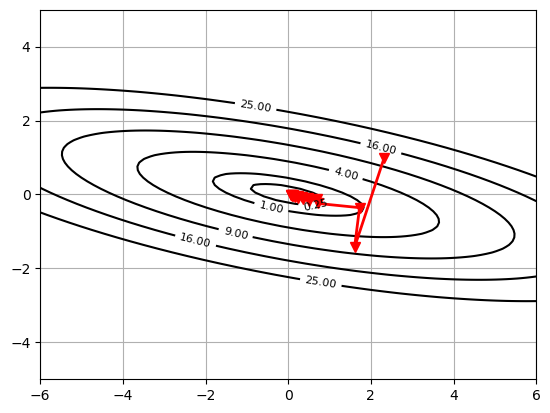

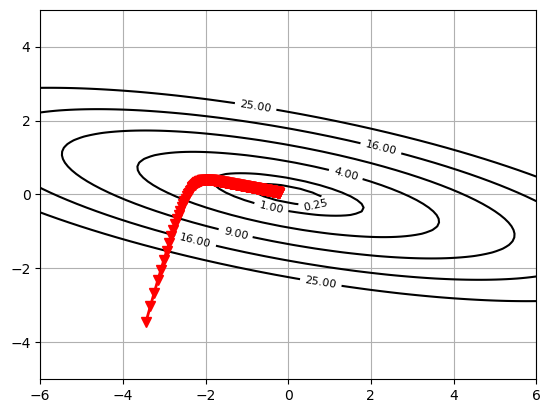

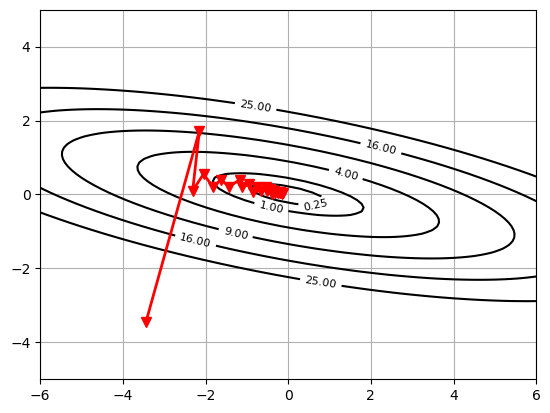

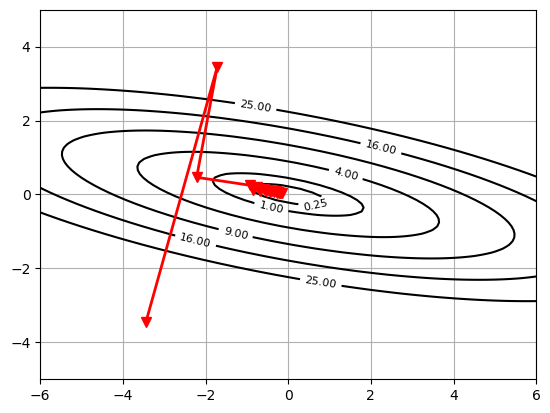

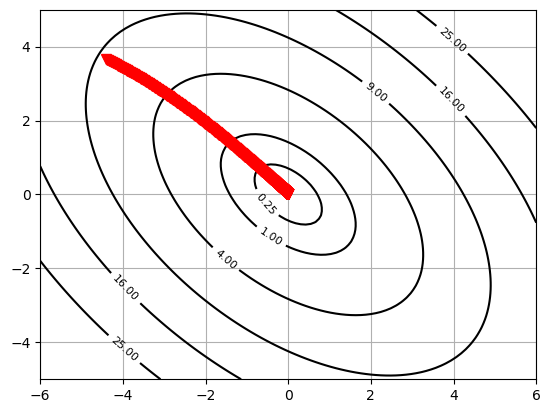

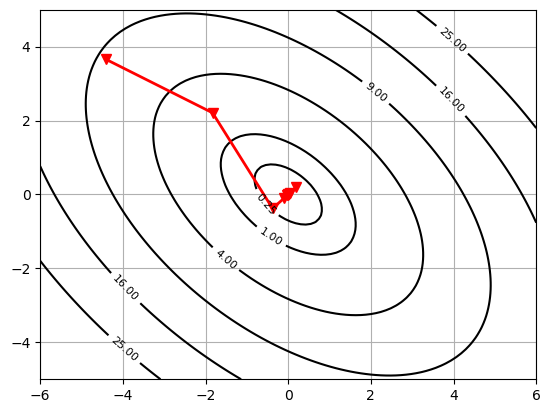

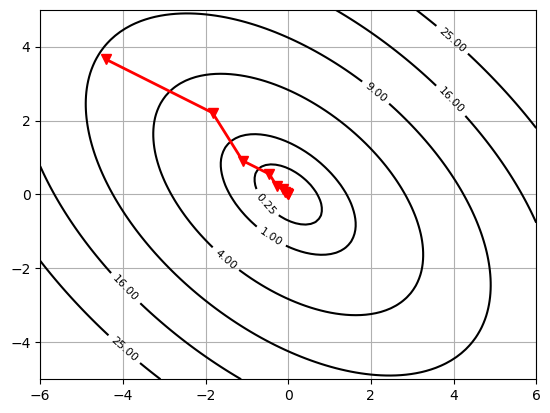

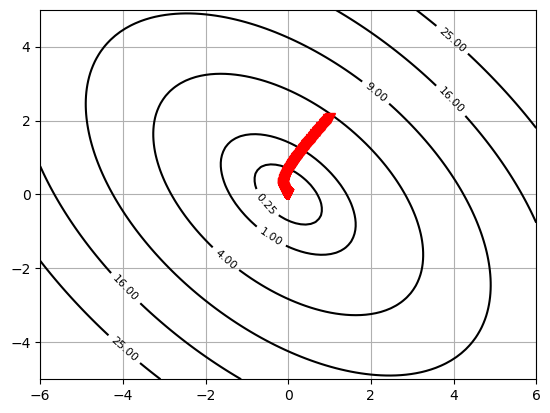

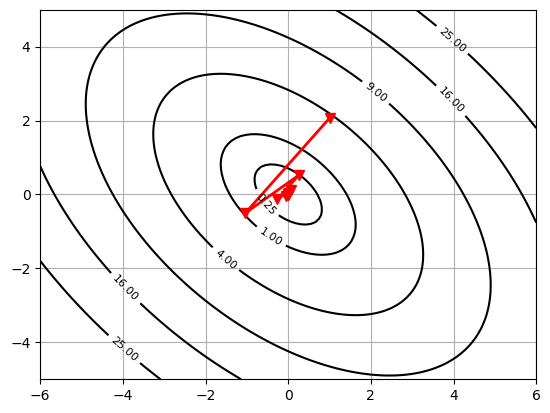

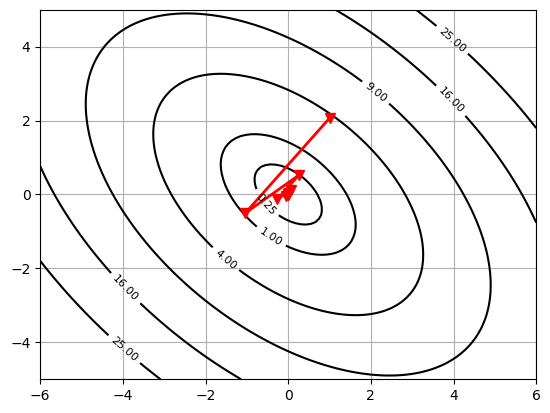

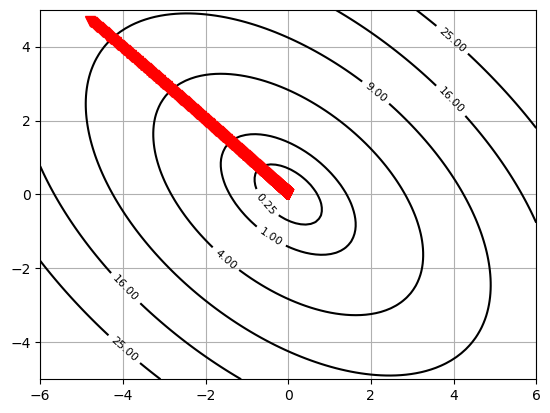

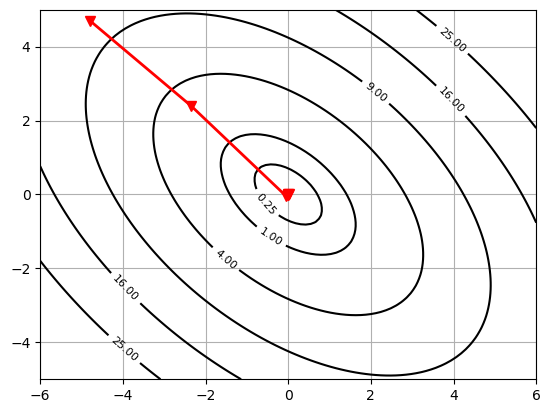

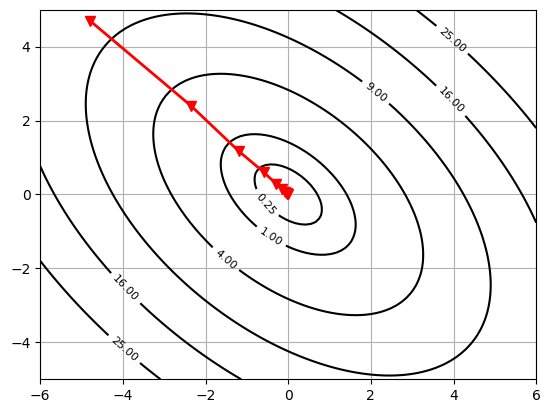

In [215]:
for i, A in enumerate([A_high_cond, A_low_cond]):
    cond_num = np.linalg.cond(A)
    start_points = [np.random.uniform(-5, 5, size=2) for _ in range(3)]
    methods = ['Constant','Armijo', 'Wolfe']
    oracle = QuadraticOracle(A, np.zeros(2))
    
    for j, x_0 in enumerate(start_points):
        for method in methods:
            x_star, msg, history = gradient_descent(oracle, x_0, line_search_options={'method': method, 'c':0.01},trace=True)
            print(f'Conditional number = {round(cond_num, 2)}, start point = {j}, method = {method}, iterations = {len(history["x"])}')
            plt.figure()
            plot_levels(oracle.func)
            plot_trajectory(oracle.func, history['x'])
            plt.savefig(f'experiment_1/{i}_{j}_{method}')

### Change method

In [6]:
start = np.array([4, 0])
A = np.array([[2.0, 3.0],[3.0, 6.0]])
oracle = QuadraticOracle(A, np.zeros(2))

#### Armijo, c = 1e-4

SUCCESS, number of iterations: 57


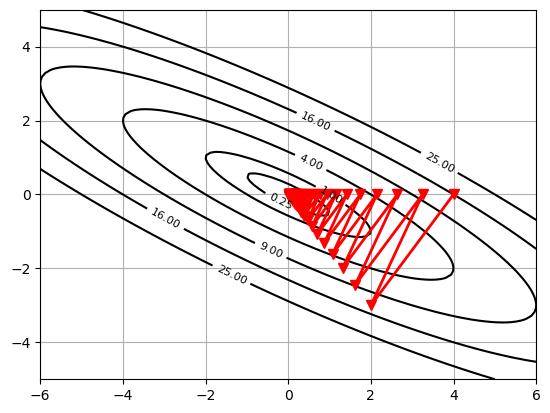

In [7]:
[x_star, msg, history] = gradient_descent(oracle, start, trace=True, 
                        line_search_options={'method': 'Armijo', 'c1': 1e-4})
print(f'{msg.upper()}, number of iterations: {len(history["time"])}')
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

#### Wolfe

Iterations num: 34


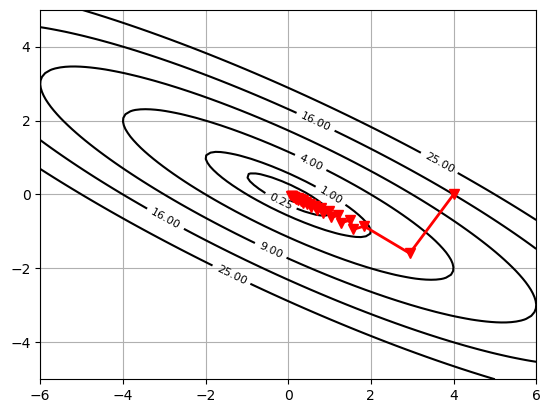

In [8]:
[x_star, msg, history] = gradient_descent(oracle, start, trace=True,line_search_options={'method':'Wolfe'})
print(f'Iterations num: {len(history["time"])}')
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

Iterations num: 86


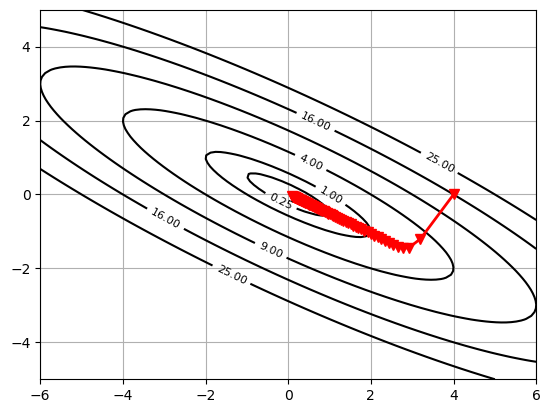

In [9]:
[x_star, msg, history] = gradient_descent(oracle, start, trace=True,line_search_options={'method':'Constant', 'c': 0.1})
print(f'Iterations num: {len(history["time"])}')
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

### Change start point

In [76]:
A = np.array([[2.0, 3.0],
              [3.0, 6.0]])
oracle = QuadraticOracle(A, np.zeros(2))

In [72]:
start_points = [[-4,2], [2, 0], [0, 100], [10000, 10000], [4, 0]]

In [73]:
for i in range(5):
    [x_star, msg, history] = gradient_descent(oracle, np.array(start_points[i]), trace=True)
    print(f'Quadratic function {i + 1}, iterations: {len(history["time"])}')

Quadratic function 1, iterations: 87
Quadratic function 2, iterations: 108
Quadratic function 3, iterations: 53
Quadratic function 4, iterations: 131
Quadratic function 5, iterations: 116


In [78]:
oracle1 = QuadraticOracle(np.array([[1.0, 0.0],
                                    [0.0, 1.0]]), np.zeros(2))

In [80]:
for i in range(5):
    [x_star, msg, history] = gradient_descent(oracle1, np.array(start_points[i]), trace=True)
    print(f'Quadratic function {i + 1}, iterations: {len(history["time"])}')

Quadratic function 1, iterations: 2
Quadratic function 2, iterations: 2
Quadratic function 3, iterations: 2
Quadratic function 4, iterations: 2
Quadratic function 5, iterations: 2


## Experiment 2

In [16]:
np.random.seed(42)
seeds = np.random.randint(1, 30000, 5)

In [17]:
n_dim = [10, 100, 1000, 10000, 100000]
colors = ['r', 'g', 'b', 'm', 'y']
labels = ['n = 10', 'n = 100', 'n = 1000', 'n = 10000', 'n = 100000']
options = list(zip(n_dim, colors, labels))
cond_numbers = np.arange(1, 1001, 50)

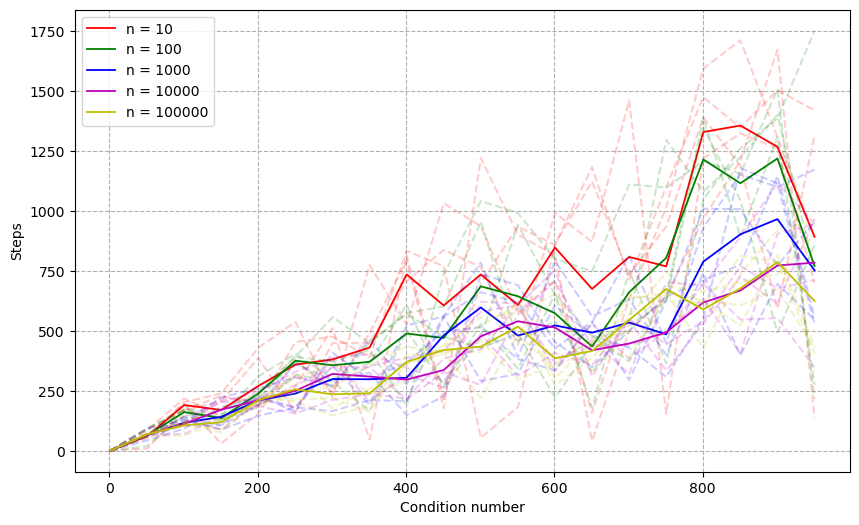

In [25]:
fig = plt.figure(figsize=(10, 6))
plt.xlabel('Condition number')
plt.ylabel('Steps')
plt.grid(linestyle='--')

for n, color, label in options: # для каждой размерности пространства n
    y = np.zeros(len(cond_numbers))
    for seed in seeds: # для каждого случайного построения
        np.random.seed(seed)
        y_curr = []
        for c in cond_numbers: # для каждого числа обусловленности
            diag = np.random.uniform(1, c, size=n)
            diag[0] = 1
            diag[-1] = c
            A, b = scipy.sparse.diags(diag, 0), np.random.rand(n)
            oracle = QuadraticOracle(A, b)
            _, _, history = gradient_descent(oracle,np.zeros(n),trace=True)
            y_curr.append(len(history['time']))

        y += np.array(y_curr)
        plt.plot(cond_numbers, y_curr, color + '--', alpha=0.2)

    plt.plot(cond_numbers, y / (1. * len(seeds)), color, linewidth=1.3, label=label)
    
plt.legend(loc='best')
plt.savefig('/experiment_2/experiment_2')

## Experiment 3

Небольшое пояснение: метод Ньютона для real-sim отдельно запускался в colab и его результаты не представлены в этом ноутбуке

In [2]:
from sklearn import datasets

In [181]:
def experiment_3(file_name, dataset_name):
    
    def read_data(f):
        data = datasets.load_svmlight_file(f)
        return data[0], data[1]
    
    def plot(history_GD, history_NM, p, dataset_name):
        y_gd, t_gd = history_GD[p], history_GD['time']
        y_nm, t_nm = history_NM[p], history_NM['time']
        if p == 'grad_norm':
            y_gd = np.square(np.array(y_gd, copy=True))
            y_nm = np.square(np.array(y_nm, copy=True))
            y_gd = np.log(y_gd / y_gd[0])
            y_nm = np.log(y_nm / y_nm[0])

        fig = plt.figure()
        plt.xlabel('Time, seconds')
        ylabel = 'Function value' if p == 'func' else r'$\log  \| \nabla f(x_k) \|_2^2 / \| \nabla f(x_0) \|_2^2$'
        plt.ylabel(ylabel)
        plt.plot(t_gd, y_gd, label='Gradient Descent')
        plt.plot(t_nm, y_nm, label='Newton method')
        plt.legend()
        plt.grid(linestyle='--')
        plt.savefig(f'experiment_3/results/{dataset_name}-{p}')

    X, y = read_data(file_name)
    m, n = X.shape
    regcoef = 1.0 / m
    oracle = create_log_reg_oracle(X, y, regcoef)
    history_GD, history_NM = None, None
    
    # Gradient descent
    print('Running gradient descent')
    x_opt_GD, res_GD, history_GD = gradient_descent(oracle,np.zeros(n),trace=True)
    print(f'Gradient descent is done, result is: {res_GD}\n')
    
    # Newton
    if dataset_name != 'real-sim':
        print('Running Newton')
        x_opt_NM, res_NM, history_NM = newton(oracle,np.zeros(n),trace=True)
        print(f'Newton method is done, result is: {res_NM}')
    
    print(f"GD iters: {len(history_GD['time'])}")
    print(f"NM iters: {len(history_NM['time'])}")
    plot(history_GD, history_NM, 'func', dataset_name)
    plot(history_GD, history_NM, 'grad_norm', dataset_name)

In [200]:
def experiment_3_realsim(file_name, dataset_name):
    
    def read_data(f):
        data = datasets.load_svmlight_file(f)
        return data[0], data[1]
    
    def plot(history_GD, p, dataset_name):
        y_gd, t_gd = history_GD[p], history_GD['time']
        if p == 'grad_norm':
            y_gd = np.square(np.array(y_gd, copy=True))
            y_gd = np.log(y_gd / y_gd[0])

        fig = plt.figure()
        plt.xlabel('Time, seconds')
        ylabel = 'Function value' if p == 'func' else r'$\log  \| \nabla f(x_k) \|_2^2 / \| \nabla f(x_0) \|_2^2$'
        plt.ylabel(ylabel)
        plt.plot(t_gd, y_gd, label='Gradient Descent')
        plt.legend()
        plt.grid(linestyle='--')
        plt.savefig(f'experiment_3/results/{dataset_name}-{p}')

    X, y = read_data(file_name)
    m, n = X.shape
    regcoef = 1.0 / m
    oracle = create_log_reg_oracle(X, y, regcoef)
    history_GD, history_NM = None, None
    
    # Gradient descent
    print('Running gradient descent')
    x_opt_GD, res_GD, history_GD = gradient_descent(oracle,np.zeros(n),trace=True)
    print(f'Gradient descent is done, result is: {res_GD}\n')
    
    print(f"GD iters: {len(history_GD['time'])}")
    plot(history_GD, 'func', dataset_name)
    plot(history_GD, 'grad_norm', dataset_name)

Running gradient descent
Gradient descent is done, result is: success

Running Newton
Newton method is done, result is: success
GD iters: 36
NM iters: 7


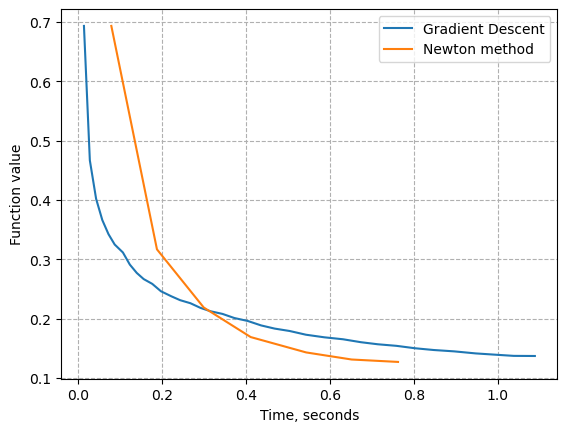

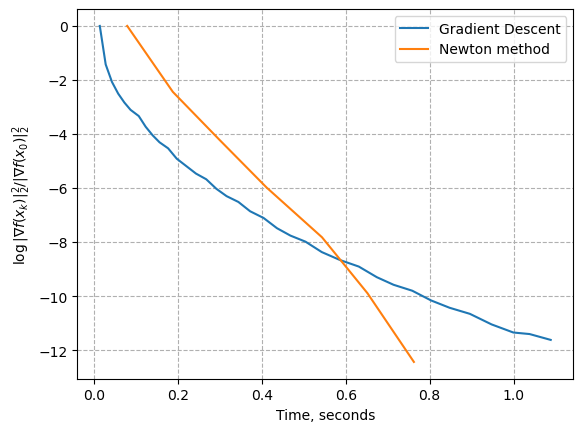

In [201]:
experiment_3('experiment_3/datasets/w8a.txt', 'w8a_2')

Running gradient descent
Gradient descent is done, result is: success

Running Newton
Newton method is done, result is: success
GD iters: 2004
NM iters: 7


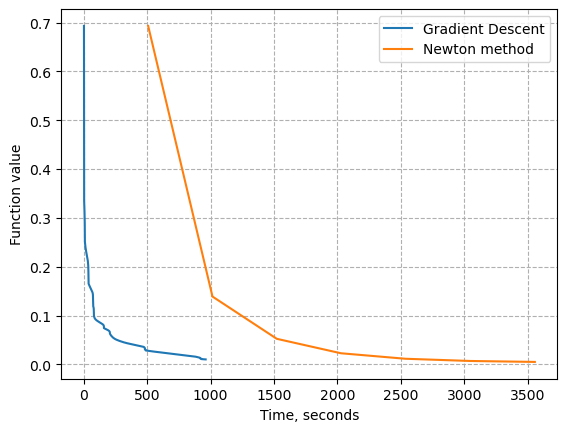

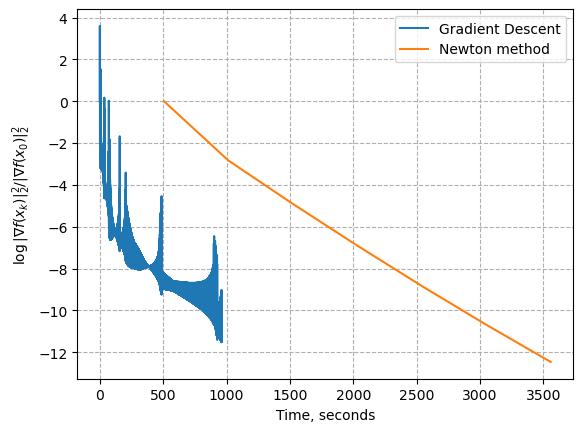

In [182]:
experiment_3('experiment_3/datasets/gisette_scale.bz2', 'gisette')

Running gradient descent
Gradient descent is done, result is: success

GD iters: 104


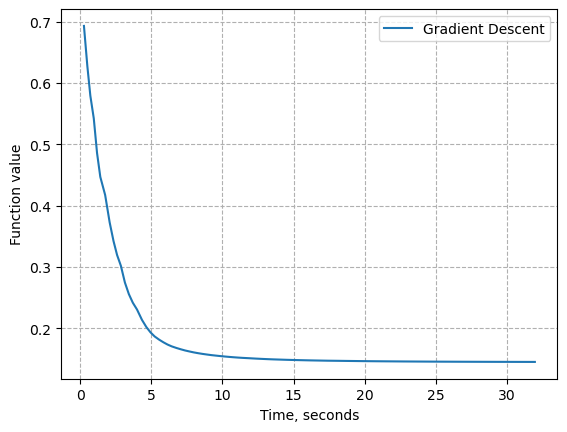

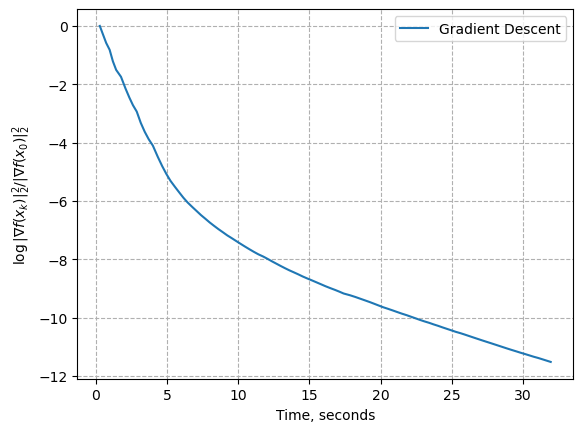

In [202]:
experiment_3_realsim('experiment_3/datasets/real-sim.bz2', 'real-sim')

## Experiment 4

In [3]:
def gen_quadratic(size=500, condition_number=10):
    diag = np.random.uniform(1, condition_number, size)
    diag[0] = 1
    diag[-1] = condition_number
    A, b = scipy.sparse.diags(diag, 0), np.random.rand(size)
    return A, b

In [4]:
def gen_log_reg(m=500, n=500):
    b = np.random.choice([1, -1], size=n)
    A, _ = datasets.make_classification(m, n)
    return A, b

In [22]:
def experiment_4(model, x_0, i):
    size = 500
    def get_y(history, cr):
        if cr == 'func':
            f_k = np.array(history['func'])
            return np.log(f_k / f_k[0])
        else:
            grad_norm = np.square(np.array(history['grad_norm']))
            return np.log(grad_norm / grad_norm[0])
        
    constant_steps = [0.001, 0.01, 0.1, 0.5, 1, 10]
    c1_opt = [0.0001, 0.1, 0.3]
    c2_opt = [0.001, 0.1, 0.9]
    
    
    if model == 'quadratic':
        A, b = gen_quadratic(size=size)
        oracle = QuadraticOracle(A, b)
        cr = 'func'
    else:
        A, b = gen_log_reg()
        oracle = create_log_reg_oracle(A, b, 1./b.size)
        cr = 'grad_norm'
    
    # Method: constant
    fig = plt.figure()
    plt.xlabel('Iterations')
    ylabel = r'$\log  \| \nabla f(x_k) \|_2^2 / \| \nabla f(x_0) \|_2^2$' if cr == 'grad_norm' else r'$\log (f(x_k) / f(x_0)) $'
    plt.ylabel(ylabel)
    plt.ylim([-15, 0])
    plt.title('Constant')

    for c in constant_steps:
        x_star, msg, history = gradient_descent(oracle,x_0,trace=True, line_search_options={'method':'Constant', 'c': c})
        print(f'constant {c}: {msg}, {len(history["time"])}')
        iters = np.arange(len(history[cr]))
        y = get_y(history, cr)
        plt.plot(iters, y, label=f'c = {c}')


    plt.legend()
    plt.grid(linestyle='--')
    plt.savefig(f'experiment_4/experiment_4-{model}-constant-sp{i}')


    # Method: armijo
    fig = plt.figure()
    plt.xlabel('Iterations')
    plt.ylabel(ylabel)
    plt.title('Armijo and Wolfe')
    plt.ylim([-15, 0])

    history_armijo_wolfe = []
    for c1 in c1_opt:
        x_star, msg, history = gradient_descent(oracle,x_0,trace=True, line_search_options={'method':'Armijo', 'c1': c1})
        print(f'armijo {c1}: {msg}, {len(history["time"])}')
        iters = np.arange(len(history[cr]))
        y = get_y(history, cr)
        plt.plot(iters, y, label=f'Armijo, c1 = {c1}')

    # Method: wolfe
    for c2 in c2_opt:
        x_star, msg, history = gradient_descent(oracle,x_0,trace=True, line_search_options={'method':'Wolfe', 'c1': 0.0001, 'c2':c2})
        print(f'wolfe {c2}: {msg}, {len(history["time"])}')
        iters = np.arange(len(history[cr]))
        y = get_y(history, cr)
        plt.plot(iters, y, label=f'Wolfe, c1 = 1e-4, c2 = {c2}')

    plt.legend()
    plt.grid(linestyle='--')
    plt.savefig(f'experiment_4/experiment_4-{model}-arm_wol-sp{i}')
    
    return x_star

### GD - logistic regression

In [152]:
x_0, i = np.zeros(500), 0

constant 0.001: iterations_exceeded, 10001
constant 0.01: iterations_exceeded, 10001
constant 0.1: success, 3393
constant 0.5: success, 678
constant 1: success, 339
constant 10: success, 46
armijo 0.0001: success, 45
armijo 0.1: success, 46
armijo 0.3: success, 43
wolfe 0.001: success, 53
wolfe 0.1: success, 28
wolfe 0.9: success, 47


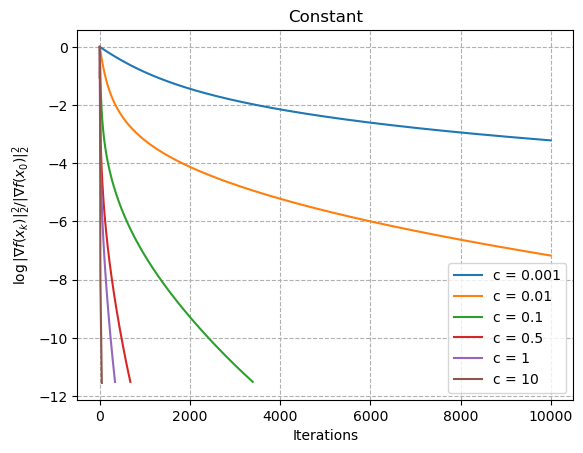

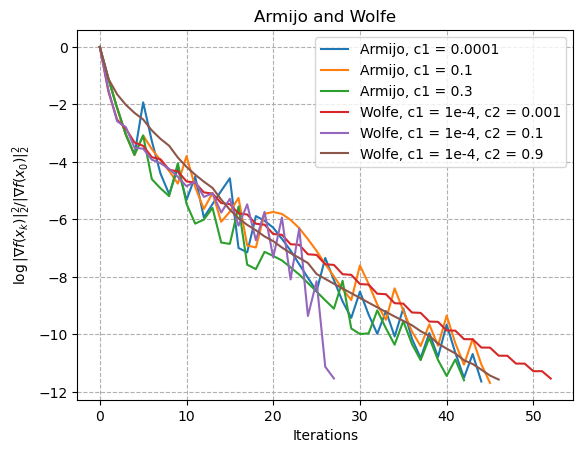

In [153]:
x_star = experiment_4('logreg', x_0, i)

In [154]:
x_0 = x_star + np.random.normal(loc=10, scale=5, size=500)
i += 1

constant 0.001: iterations_exceeded, 10001
constant 0.01: iterations_exceeded, 10001
constant 0.1: iterations_exceeded, 10001
constant 0.5: success, 4265
constant 1: success, 2132
constant 10: success, 213
armijo 0.0001: success, 61
armijo 0.1: success, 57
armijo 0.3: success, 64
wolfe 0.001: success, 71
wolfe 0.1: success, 68
wolfe 0.9: success, 103


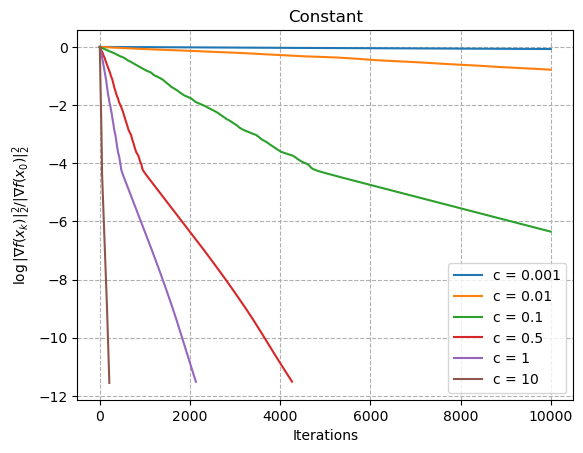

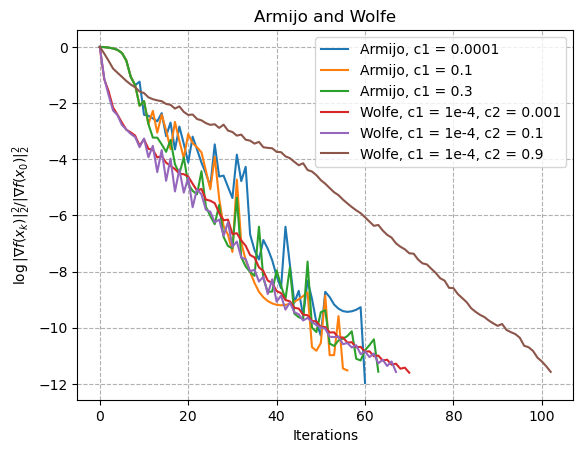

In [155]:
x_star = experiment_4('logreg', x_0, i)

In [156]:
x_0 = x_star + np.random.normal(loc=50, scale=5, size=500)
i += 1

constant 0.001: iterations_exceeded, 10001
constant 0.01: iterations_exceeded, 10001
constant 0.1: iterations_exceeded, 10001
constant 0.5: success, 5080
constant 1: success, 2539
constant 10: success, 253
armijo 0.0001: success, 56
armijo 0.1: success, 54
armijo 0.3: success, 42
wolfe 0.001: success, 51
wolfe 0.1: success, 50
wolfe 0.9: success, 120


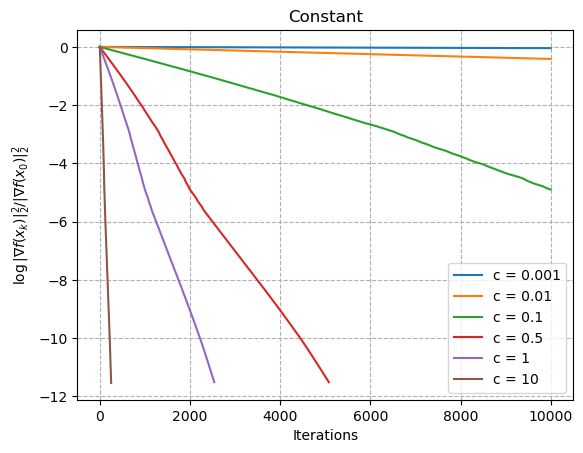

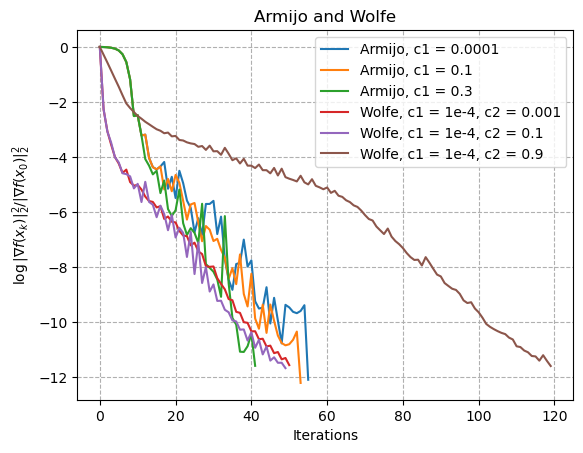

In [157]:
x_star = experiment_4('logreg', x_0, i)

### GD - quadratic

In [23]:
x_0, i = np.zeros(500), 0

constant 0.001: success, 3915
constant 0.01: success, 391
constant 0.1: success, 38
constant 0.5: success, 10001
constant 1: success, 10001
constant 10: success, 10001
armijo 0.0001: success, 20
armijo 0.1: success, 20
armijo 0.3: success, 19
wolfe 0.001: success, 22
wolfe 0.1: success, 22
wolfe 0.9: success, 22


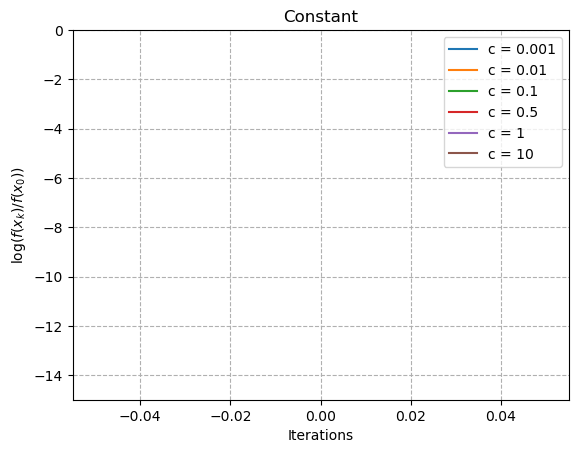

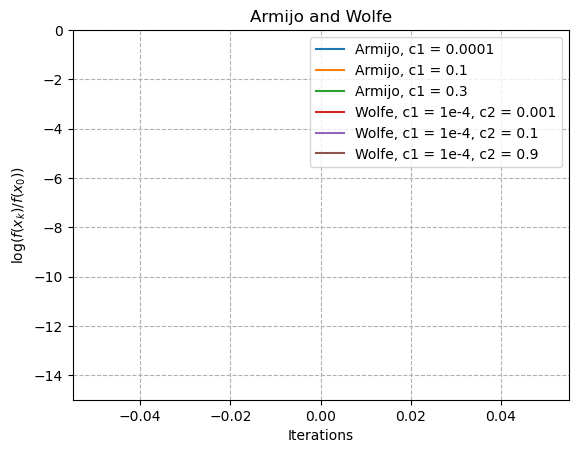

In [24]:
x_star = experiment_4('quadratic', x_0, i)

In [25]:
x_0 = x_star + np.random.normal(loc=10, scale=5, size=500)
i += 1

constant 0.001: success, 2231
constant 0.01: success, 223
constant 0.1: success, 22
constant 0.5: success, 10001
constant 1: success, 10001
constant 10: success, 10001
armijo 0.0001: success, 12
armijo 0.1: success, 12
armijo 0.3: success, 12
wolfe 0.001: success, 14
wolfe 0.1: success, 14
wolfe 0.9: success, 14


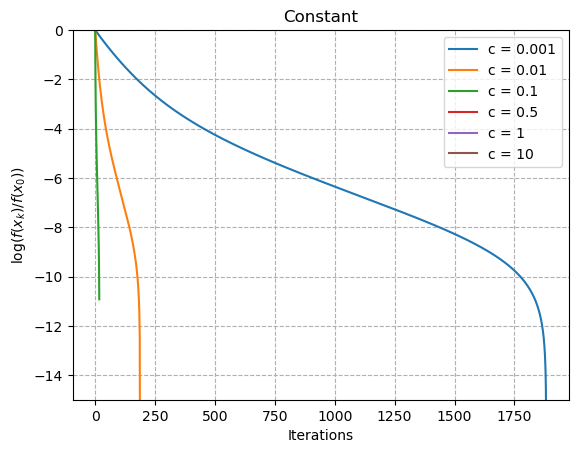

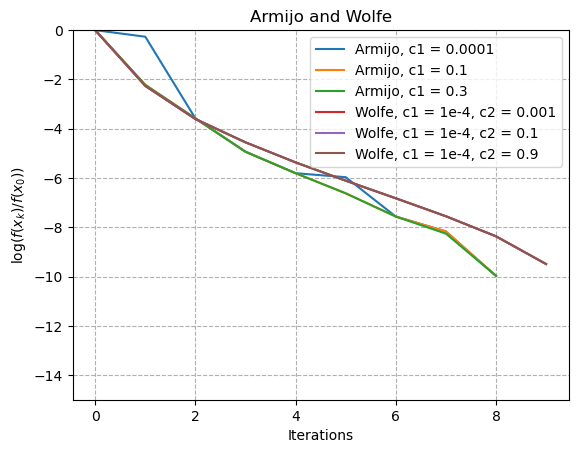

In [26]:
x_star = experiment_4('quadratic', x_0, i)

In [27]:
x_0 = x_star + np.random.normal(loc=50, scale=5, size=500)
i += 1

constant 0.001: success, 2415
constant 0.01: success, 241
constant 0.1: success, 24
constant 0.5: success, 10001
constant 1: success, 10001
constant 10: success, 10001
armijo 0.0001: success, 15
armijo 0.1: success, 14
armijo 0.3: success, 14
wolfe 0.001: success, 15
wolfe 0.1: success, 15
wolfe 0.9: success, 15


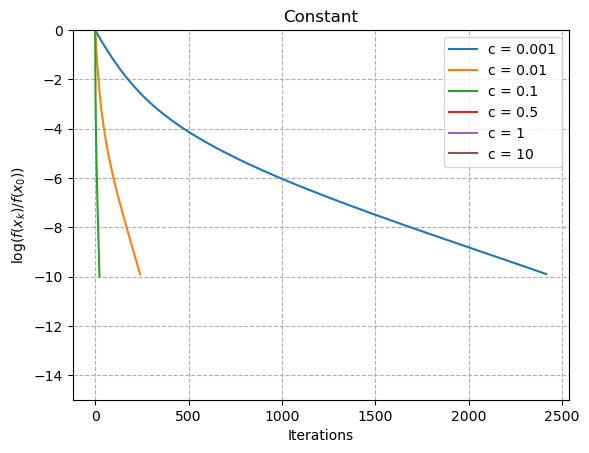

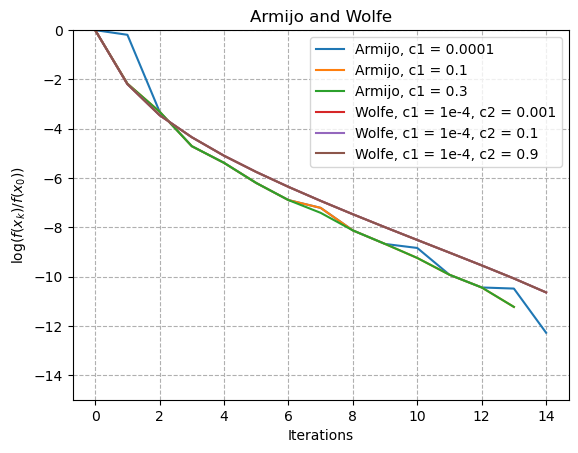

In [28]:
x_star = experiment_4('quadratic', x_0, i)

## Experiment 5

In [191]:
def experiment_5(model, x_0, i):
    size = 500
    def get_y(history, cr):
        if cr == 'func':
            f_k = np.array(history['func'])
            return np.log(f_k / f_k[0])
        else:
            grad_norm = np.square(np.array(history['grad_norm']))
            return np.log(grad_norm / grad_norm[0])
        
    constant_steps = [0.001, 0.01, 0.1, 0.5, 1, 10]
    c1_opt = [0.0001, 0.1, 0.3]
    c2_opt = [0.001, 0.1, 0.9]
    
    A, b = gen_log_reg()
    oracle = create_log_reg_oracle(A, b, 1./b.size)
    cr = 'grad_norm'
    
    # Method: constant
    fig = plt.figure()
    plt.xlabel('Iterations')
    ylabel = r'$\log  \| \nabla f(x_k) \|_2^2 / \| \nabla f(x_0) \|_2^2$' if cr == 'grad_norm' else r'$\log (f(x_k) / f(x_0)) $'
    plt.ylabel(ylabel)
    plt.title('Constant')
    plt.ylim([-15, 0])

    for c in constant_steps:
        x_star, msg, history = newton(oracle,x_0,trace=True, line_search_options={'method':'Constant', 'c': c})
        print(f'constant {c}: {msg}, {len(history["time"])}')
        iters = np.arange(len(history[cr]))
        y = get_y(history, cr)
        plt.plot(iters, y, label=f'c = {c}')


    plt.legend()
    plt.grid(linestyle='--')
    plt.savefig(f'experiment_5/experiment_5-{model}-constant-sp{i}')


    # Method: armijo
    fig = plt.figure()
    plt.xlabel('Iterations')
    plt.ylabel(ylabel)
    plt.title('Armijo and Wolfe')

    history_armijo_wolfe = []
    for c1 in c1_opt:
        x_star, msg, history = newton(oracle,x_0,trace=True, line_search_options={'method':'Armijo', 'c1': c1})
        print(f'armijo {c1}: {msg}, {len(history["time"])}')
        iters = np.arange(len(history[cr]))
        y = get_y(history, cr)
        plt.plot(iters, y, label=f'Armijo, c1 = {c1}')

    # Method: wolfe
    for c2 in c2_opt:
        x_star, msg, history = newton(oracle,x_0,trace=True, line_search_options={'method':'Wolfe', 'c1': 0.0001, 'c2':c2})
        print(f'wolfe {c2}: {msg}, {len(history["time"])}')
        iters = np.arange(len(history[cr]))
        y = get_y(history, cr)
        plt.plot(iters, y, label=f'Wolfe, c1 = 1e-4, c2 = {c2}')

    plt.legend()
    plt.grid(linestyle='--')
    plt.ylim([-15, 0])
    plt.savefig(f'experiment_5/experiment_5-{model}-arm_wol-sp{i}')
    
    return x_star

In [192]:
x_0, i = np.zeros(500), 0

constant 0.001: iterations_exceeded, 101
constant 0.01: iterations_exceeded, 101
constant 0.1: success, 58
constant 0.5: success, 12
constant 1: success, 6
constant 10: iterations_exceeded, 101
armijo 0.0001: success, 6
armijo 0.1: success, 6
armijo 0.3: success, 6
wolfe 0.001: success, 5
wolfe 0.1: success, 5
wolfe 0.9: success, 6


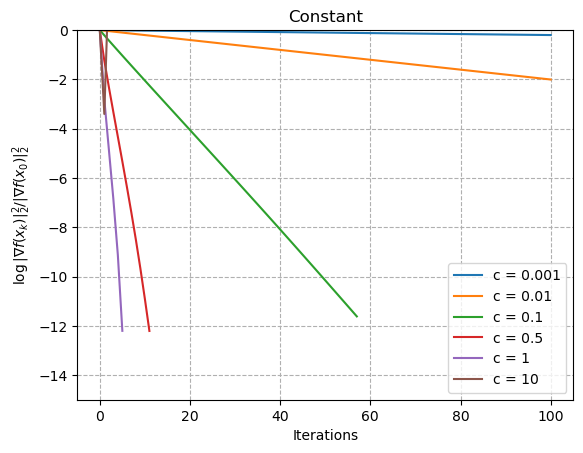

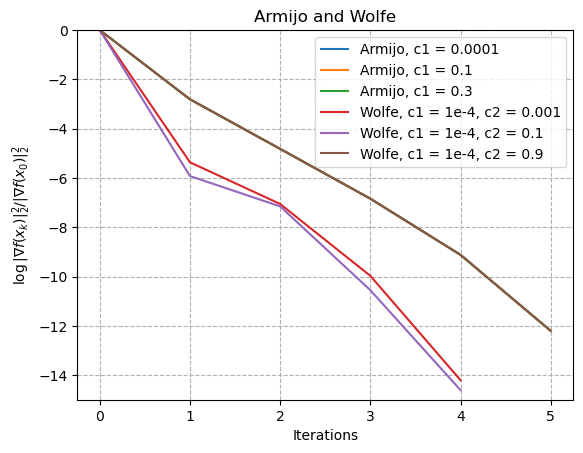

In [193]:
x_star = experiment_5('logreg', x_0, i)

In [194]:
x_0 = x_star + np.random.normal(loc=10, scale=5, size=500)
i += 1

constant 0.001: iterations_exceeded, 101
constant 0.01: iterations_exceeded, 101
constant 0.1: success, 52
constant 0.5: iterations_exceeded, 101
constant 1: iterations_exceeded, 101
constant 10: iterations_exceeded, 101
armijo 0.0001: success, 38
armijo 0.1: success, 38
armijo 0.3: success, 38
wolfe 0.001: success, 16
wolfe 0.1: success, 17
wolfe 0.9: success, 21


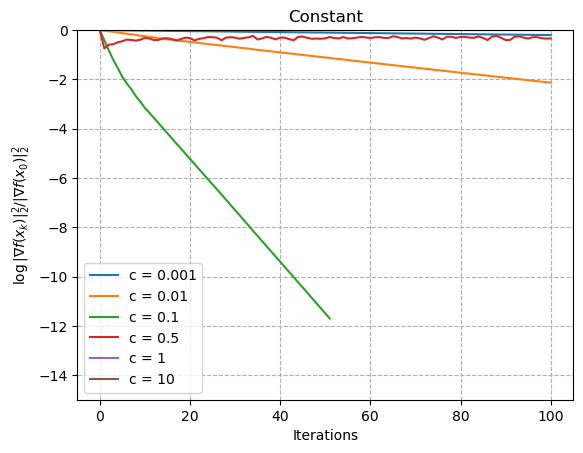

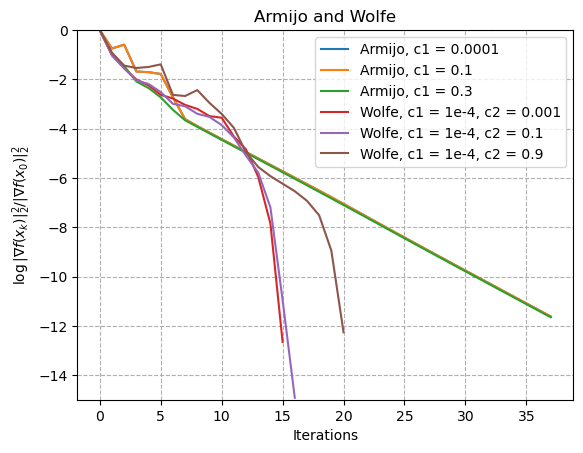

In [195]:
x_star = experiment_5('logreg', x_0, i)

In [196]:
x_0 = x_star + np.random.normal(loc=50, scale=5, size=500)
i += 1

constant 0.001: iterations_exceeded, 101
constant 0.01: iterations_exceeded, 101
constant 0.1: success, 54
constant 0.5: iterations_exceeded, 101
constant 1: iterations_exceeded, 101
constant 10: iterations_exceeded, 101
armijo 0.0001: success, 35
armijo 0.1: success, 33
armijo 0.3: success, 31
wolfe 0.001: success, 17
wolfe 0.1: success, 17
wolfe 0.9: success, 24


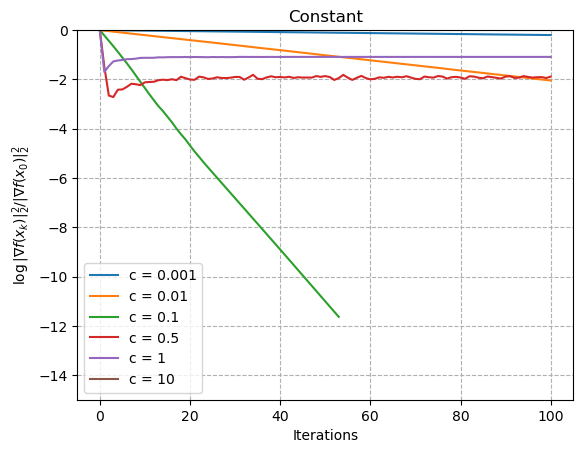

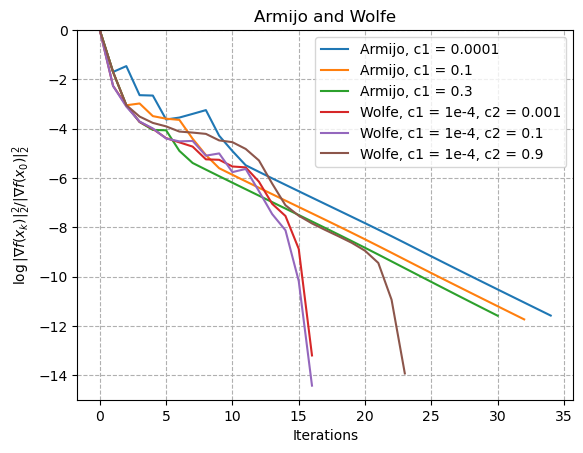

In [197]:
x_star = experiment_5('logreg', x_0, i)